In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from pandas.plotting import parallel_coordinates
from pandas.plotting import scatter_matrix
from scipy.cluster import hierarchy
import weightedstats as ws
from scipy.stats import wilcoxon

# Familiarize Ourselves with the Data

In [3]:
suicide_rates = pd.read_csv('data_raw/suicide_rates.csv')
suicide_rates.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X


# Univariate Analysis

## Central Tendency: Quantitative Variable(s)

 - `np.mean(x)`: The _arithmetic mean_: The sum divided by the length
 - `stats.trim_mean(x, proportioncut = 0.1)`: The _trimmed arithmetic mean_: the average of all values after dropping a fixed percentage of extreme values (e.g., `trim=0.1` for 10%)
 - `np.median(x)`: The _median_: A value where 50% of x is above it, and 50% is below it
 - `np.average(x, weights)`: The _weighted mean_: the sum of all values times a weight divided by the sum of all the weights
 - `ws.weighted_median (data, weights)`: The _weighted median_: The value such that the sum of the weights is equal for the lower and upper halves of the sorted list of data values
 

Let's calculate the mean, trimmed mean, and median of the following quantitative variables:
1. `suicides/100k pop`
2. `gdp_per_capita($)`

In [4]:
suicide_rates.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
suicides_per_100k = suicide_rates.loc[:,["suicides/100k pop"]]
suicides_per_100k.head(10)

,suicides/100k pop
0,6.71
1,5.19
2,4.83
3,4.59
4,3.28
5,2.81
6,2.15
7,1.56
8,0.73
9,0.00


In [6]:
suicides_per_100k.mean().iloc[0]

12.816097411933864

In [7]:
stats.trim_mean(suicides_per_100k, proportiontocut = 0.1)[0]

8.69437724658519

In [8]:
suicides_per_100k.median()[0]

5.99

The fact that the median is less than the mean (trimmed or not) points to a strong right skew within the spread of the data for `suicides_per_100k`

In [9]:
gdp_per_capita = suicide_rates.loc[:,["gdp_per_capita ($)"]]
gdp_per_capita.head()

,gdp_per_capita ($)
0,796
1,796
2,796
3,796
4,796


In [10]:
gdp_per_capita.mean().iloc[0]

16866.464414090584

In [11]:
stats.trim_mean(gdp_per_capita, proportiontocut = 0.1)[0]

13390.87688713156

In [12]:
gdp_per_capita.median()[0]

9372.0

The same skew exists for the `gdp_per_capita` variable. It's too early to tell, but we can lean towards thinking there may be some relation between the two variables

## Central Tendency: Categorical Variable
For categorical data, simple proportions or percentages tell the story of the data. In this example, we can perform the simple task of looking up the number of suicides per year. This could perhaps help us identify years with higher (or maybe lower number of) deaths and allow us to narrow our search as to regarding the reasons behind the uptick/downtick in the suicides. Can help us identify which factors highly correlate with suicides.

### Bar plot - By Year

In [13]:
year_count = suicide_rates.groupby('year').sum()
year_count = year_count.loc[:, ['suicides_no']].reset_index()
year_count.head(3)

,year,suicides_no
0,1985,116063
1,1986,120670
2,1987,126842


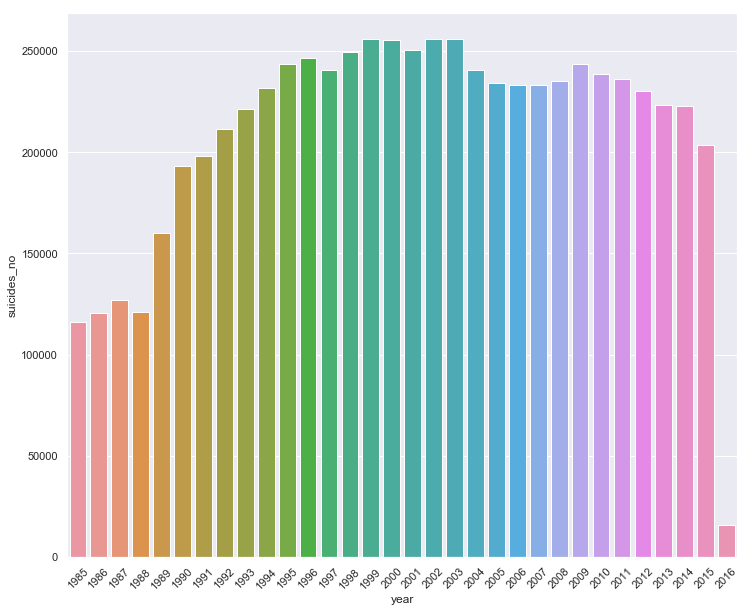

In [14]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.barplot(x = year_count['year'], y = year_count['suicides_no'], data = year_count)
plt.xticks(rotation = 45)
plt.show()

### Pie Chart - By Generation

In [15]:
gen_count = suicide_rates.groupby('generation').sum()
gen_count = gen_count.loc[:, ['suicides_no']]
gen_count

,suicides_no
generation,
Boomers,2284498
G.I. Generation,510009
Generation X,1532804
Generation Z,15906
Millenials,623459
Silent,1781744


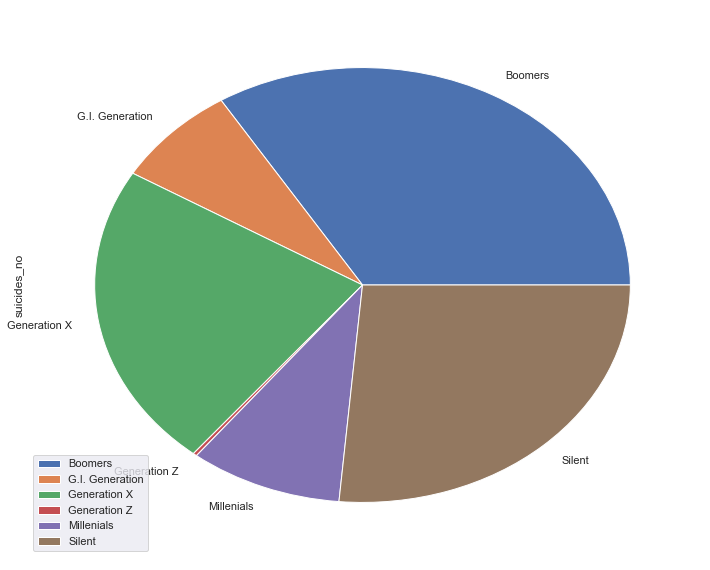

In [16]:
gen_count.plot(kind = 'pie', y = 'suicides_no')

## 3.3 Measures of Variability: Quantitative Variable

 - `np.var(x)`: _Variance_: the average distance from the mean
 - `np.std(x)`: _Standard deviation_: sqrt(variance) or the average spread around the mean
 - `stats.iqr(x)`: _Interquartile range_: the difference between the 75th percentile and the 25th percentile of the sorted data values
 - `pd.mad()`: _Median absolute deivation_: the median of the absolute value of the deviations from the mean median(abs(x - mean(x)))
 - `pd.quantile()`: Quantile of the data
 
 
We will work with the `suicides/100k pop` variable, after we add up all the values for countries. (Basically one row per country)

In [17]:
year_count = suicide_rates.groupby('year').sum()
year_count.head(3)

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,,,,,
1985,116063,1008600086,6811.89,310.428,3508548
1986,120670,1029909613,6579.84,0.000,4104636
1987,126842,1095029726,7545.45,0.000,5645760


In [18]:
year_count = year_count.loc[:, ['suicides/100k pop']]
year_count.head(3)

,suicides/100k pop
year,
1985,6811.89
1986,6579.84
1987,7545.45


In [19]:
np.var(year_count['suicides/100k pop'])

8181477.296981171

In [20]:
np.std(year_count['suicides/100k pop'])

2860.328179943898

In [21]:
stats.iqr(year_count['suicides/100k pop'])

3475.407499999994

In [22]:
year_count['suicides/100k pop'].mad()

2221.7772265625035

In [23]:
year_count['suicides/100k pop'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05     6707.4675
0.25    10199.7350
0.50    11663.8900
0.75    13675.1425
0.95    14426.3570
Name: suicides/100k pop, dtype: float64

### Exploring Data Distribution

A ___boxplot___ is based on percentiles and gives a quick way to visualize the distribution of data. In a boxplot, the top and bottom of the box are at the 75th and 25th percentiles, respectively.

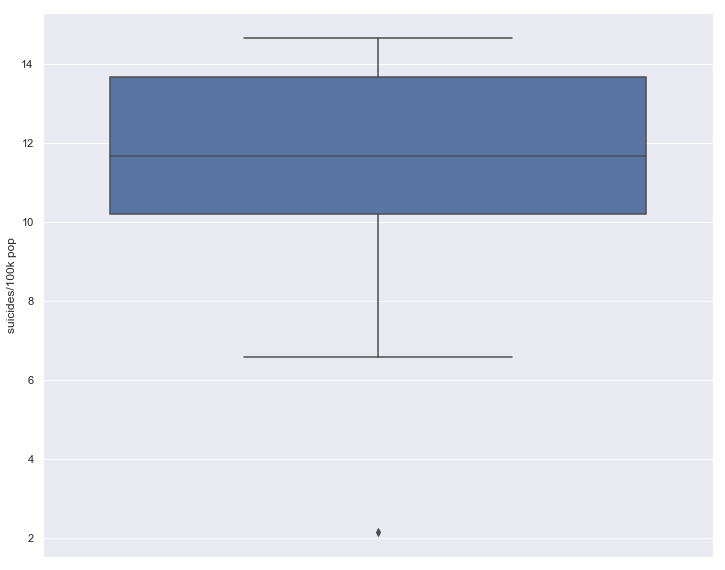

In [24]:
sns.boxplot(y = year_count['suicides/100k pop']/1000)

A ___histogram___ is a way to visualize a frequency table, with bins on the $x$-axis and data count on the $y$-axis.

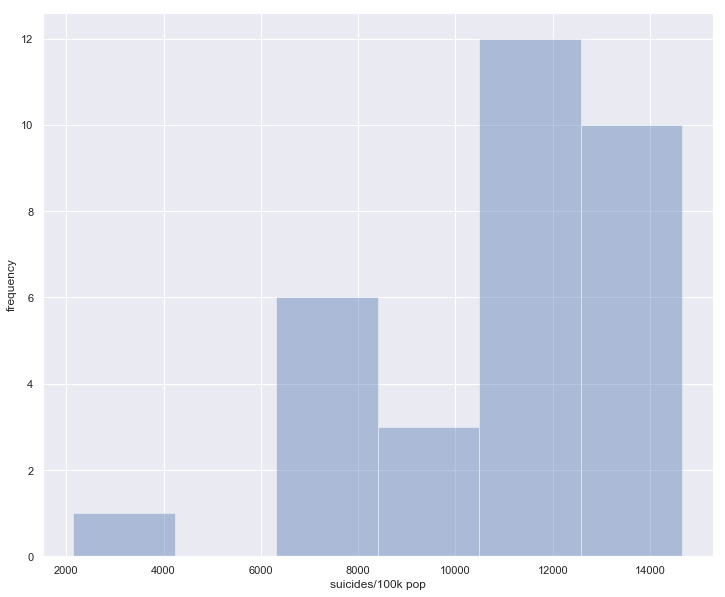

In [25]:
hist = sns.distplot(year_count['suicides/100k pop'], kde = False)
hist.set(ylabel = 'frequency')
plt.show()

A ___density plot___ is a smoothed version of a histogram:

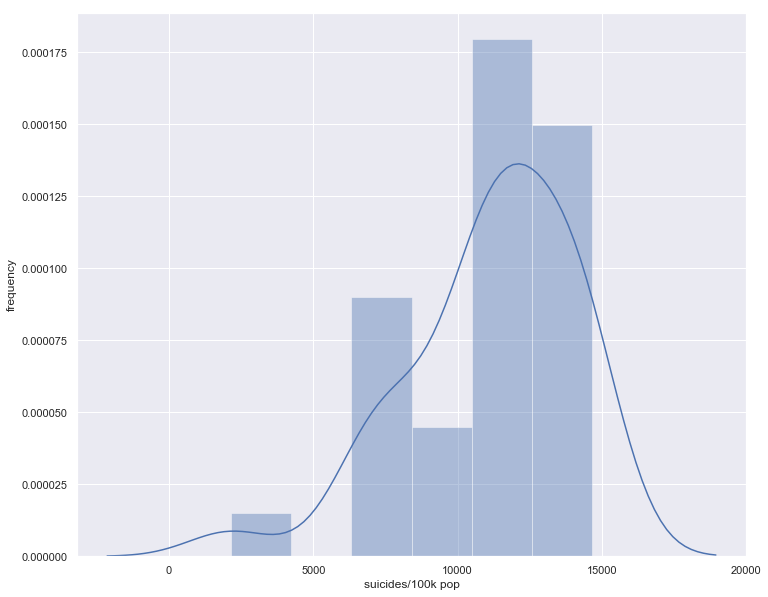

In [26]:
hist = sns.distplot(year_count['suicides/100k pop'], kde = True)
hist.set(ylabel = 'frequency')
plt.show()

# 4 Bivariate: Correlation and Scatterplot Matrices

## 4.1 Correlation Matrix

___Correlation___ (`.corr(x, y)`) is a metric that measures the extent to which two numeric variables are associated with one another:

 - Positive: if $x$) increases, then $y$ increases: +1 perfect positive correlation
 - Negative: if $x$ increases, then $y$ decreases: -1 perfect negative correlation
 - Zero: no association between them
 
Note the correlation between the `suicides_no`, `population`, `gdp_for_year`, and `gdp_per_capita`

In [27]:
usa_rates = suicide_rates[suicide_rates['country'] == 'United States']
usa_rates.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers


In [28]:
corr_vars = ['suicides_no', 'population', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'sex']
corr_df = usa_rates[corr_vars]
corr_df.head(3)

,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),sex
26848,2177,4064000,"4,346,734,000,000",19693,male
26849,5302,17971000,"4,346,734,000,000",19693,male
26850,5134,20986000,"4,346,734,000,000",19693,male


In [29]:
corr = corr_df.corr(method = 'pearson')
corr

,suicides_no,population,gdp_per_capita ($)
suicides_no,1.000000,0.549784,0.106406
population,0.549784,1.000000,0.220970
gdp_per_capita ($),0.106406,0.220970,1.000000


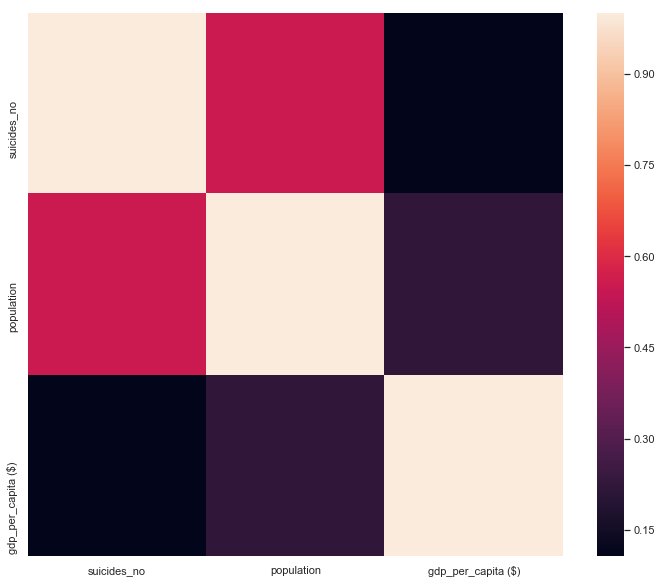

In [30]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

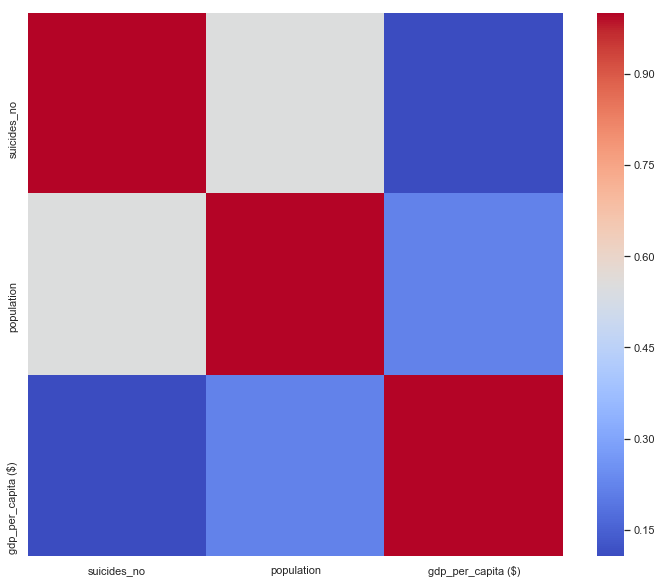

In [31]:
sns.heatmap(corr, 
            cmap='coolwarm')
plt.show()

## 4.2 Scatterplot Matrix for Predictor Variables


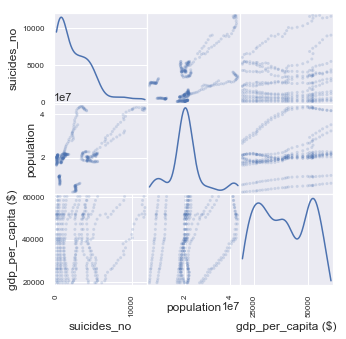

In [32]:
from pandas.plotting import scatter_matrix
scatter_matrix(corr_df, alpha=0.2, 
               figsize=(5, 5), 
               diagonal='kde')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


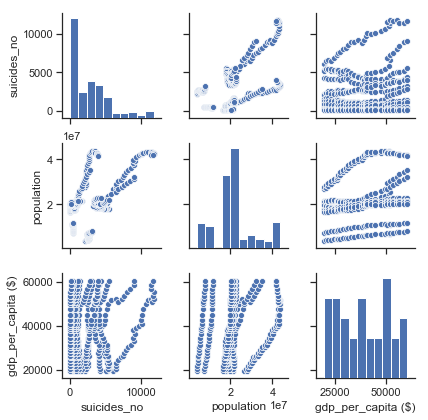

In [33]:
sns.set(style="ticks", color_codes=True)

# iris = sns.load_dataset("iris")
g = sns.pairplot(corr_df, 
                 size=2.0)

## 4.3 Scatterplot Matrix for Predictor Variables and a Response Variable

For scatterplot matrices, it is often insightful to see the pair-wise relationships between numeric predictors within each group/class of the response variable. This way a relationship between two predictor variables and one response variable is being captured:

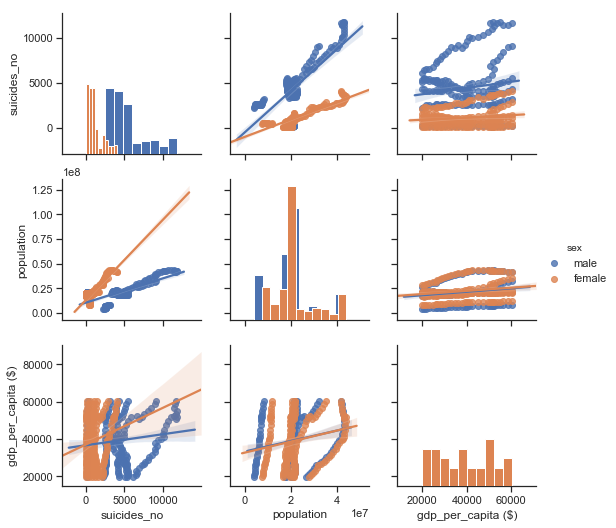

In [34]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(corr_df,
             diag_kind='hist',
             hue="sex",
             kind="reg")
plt.show()

## 4.4 Hexagonal Binning for Quantitative Variables

Scatterplots are fine for small sample sizes. Otherwise, they will be too dense to visualize the relationships. A ___hexagon binning___ plot addresses this issue, as illustrated on the `suicides_rate` data. We will correlate the year against the `gdp_per_capita`

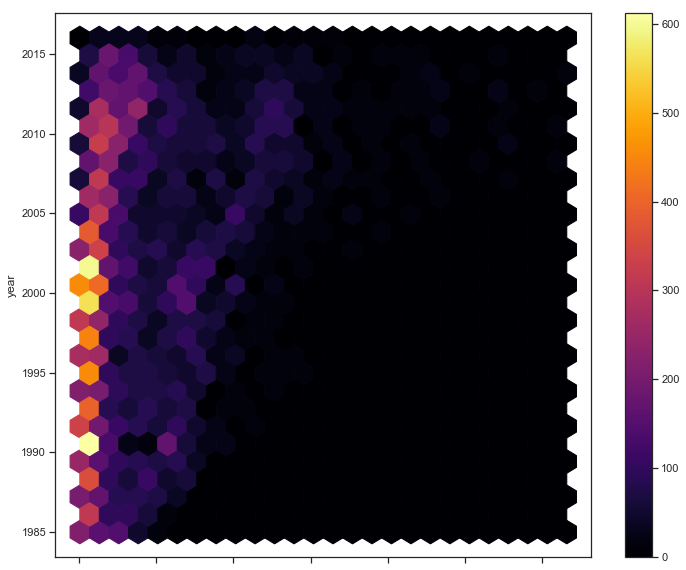

In [35]:
suicide_rates.plot.hexbin(x='gdp_per_capita ($)', 
                   y='year',
                   gridsize = 25,
                   cmap='inferno')
plt.show()

In general, a hexagonal binning plot may not be the best way to visualize this dataset. Since many rows are simply observations within one country across a specific year, when reduced to make it per country, the size of the dataset drastically decreases, rendering the usage of a hexagonal binning plot useless.

## 4.5 Correlation Plots

In [36]:
# correlation matrix of quantitative variables from USA subset of suicide rates
corr

,suicides_no,population,gdp_per_capita ($)
suicides_no,1.000000,0.549784,0.106406
population,0.549784,1.000000,0.220970
gdp_per_capita ($),0.106406,0.220970,1.000000


In [37]:
# Statistical significance

pearson_coef, p_value = stats.pearsonr(corr_df["suicides_no"], 
                                       corr_df["gdp_per_capita ($)"]) 
print("Pearson Correlation Coefficient: ", pearson_coef, 
      "\nand a P-value of:", p_value) 

Pearson Correlation Coefficient:  0.1064057044451067 
and a P-value of: 0.04024759768018369


# 5 Bivariate: Compare Quantitaive Variable against Categorical Variable

 - A _Violin_ plot: plots the density estimate with the density on the $y$-axis and the categorical variable on the $x$-axis
 - Density is mirrored and flipped: hence, $violin$
 - Pros: Unlike boxplots, they can show nuances in the distribution
 - Cons: Boxplot more clearly shows outliers

In [38]:
suicide_rates.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X


In [39]:
year_rates = suicide_rates.loc[:, ['year', 'suicides_no']]
# country_rates = country_rates.groupby('year')
year_rates.head()

,year,suicides_no
0,1987,21
1,1987,16
2,1987,14
3,1987,1
4,1987,9


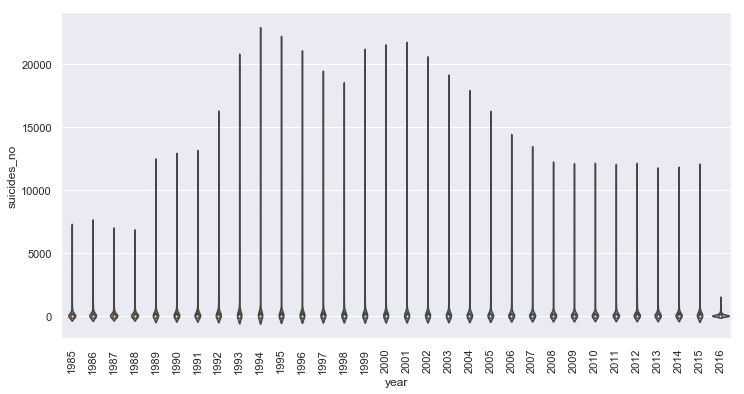

In [40]:
sns.set(rc={'figure.figsize':(12, 6)})
sns.violinplot(x = 'year', y = 'suicides_no', data = year_rates)
plt.xticks(rotation = 90)
plt.show()

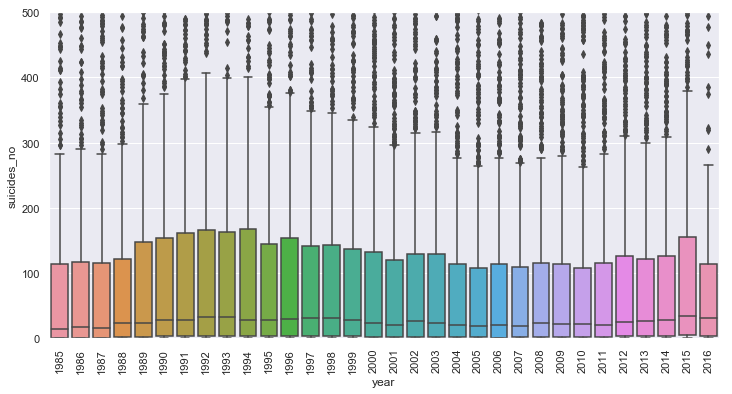

In [41]:
# a violin plot is not a good idea for a visual in this case. A boxplot would be better right now.
sns.boxplot(x = 'year', y = 'suicides_no', data = year_rates)
plt.xticks(rotation = 90)
plt.ylim(0, 500)
plt.show()